In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir('..')

In [3]:
raw_df = pd.read_csv("0_data/match_data/test-matches.csv")

raw_df

,home_team,away_team,stadium,match_date,match_time_french,home_pack_weight_average,home_forwards_average_age,home_backs_average_age,home_tallest_player,home_differents_nationalities_for_starters,...,competition,match_date_dt,match_date_time_dt,home_score,away_score,home_pack_weight_kg,away_pack_weight_kg,season,outcome,score_diff
0,AUSTRALIA,NEW ZEALAND,Suncorp Stadium,"Saturday, October 18, 2014",11:00,906 kg (113.25 kg),26,27,204,Australia : 87% (13/15) New Zealand : 7% (1/15...,...,tests-matchs.csv,2014-10-18,2014-10-18 11:00:00,28,29,906,911,NaN,-1,-1
1,USA,NEW ZEALAND,Soldier Field Stadium,"Saturday, November 1, 2014",21:00,917 kg (114.63 kg),28,28,201,United-States : 93% (14/15) New Zealand : 7% (...,...,tests-matchs.csv,2014-11-01,2014-11-01 21:00:00,6,74,917,935,NaN,-1,-68
2,ITALY,SAMOA,Stadio Cino e Lillo Del Duca,"Saturday, November 8, 2014",15:00,882 kg (110.25 kg),29,27,203,Italy : 80% (12/15) South Africa : 7% (1/15) N...,...,tests-matchs.csv,2014-11-08,2014-11-08 15:00:00,24,13,882,909,NaN,1,11
3,WALES,AUSTRALIA,Millennium Stadium,"Saturday, November 8, 2014",15:30,922 kg (115.25 kg),26,26,200,Wales : 87% (13/15) England : 7% (1/15) Tonga ...,...,tests-matchs.csv,2014-11-08,2014-11-08 15:30:00,28,33,922,886,NaN,-1,-5
4,ENGLAND,NEW ZEALAND,Twickenham,"Saturday, November 8, 2014",15:30,939 kg (117.38 kg),26,25,201,England : 73% (11/15) New Zealand : 7% (1/15) ...,...,tests-matchs.csv,2014-11-08,2014-11-08 15:30:00,21,24,939,915,NaN,-1,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,SCOTLAND,WALES,Scottish Gas Murrayfield,"Saturday, March 8, 2025",17:45,0,0,0,0,NaN,...,6-nations.csv,2025-03-08,2025-03-08 17:45:00,0,0,0,0,24/25,0,0
586,ENGLAND,ITALY,"Allianz Stadium, Twickenham","Sunday, March 9, 2025",16:00,0,0,0,0,NaN,...,6-nations.csv,2025-03-09,2025-03-09 16:00:00,0,0,0,0,24/25,0,0
587,ITALY,IRELAND,Stadio Olimpico,"Saturday, March 15, 2025",15:15,0,0,0,0,NaN,...,6-nations.csv,2025-03-15,2025-03-15 15:15:00,0,0,0,0,24/25,0,0
588,WALES,ENGLAND,Millennium Stadium,"Saturday, March 15, 2025",17:45,0,0,0,0,NaN,...,6-nations.csv,2025-03-15,2025-03-15 17:45:00,0,0,0,0,24/25,0,0


In [6]:
raw_df['away_team'].value_counts()

away_team
AUSTRALIA               59
NEW ZEALAND             58
ARGENTINA               53
SOUTH AFRICA            51
SCOTLAND                48
WALES                   47
IRELAND                 46
ITALY                   46
FRANCE                  45
ENGLAND                 43
JAPAN                   17
FIJI                    17
GEORGIA                 15
TONGA                    8
SAMOA                    8
LIONS                    6
URUGUAY                  6
CANADA                   3
USA                      3
RUSSIA                   2
BARBARIAN F.C.           2
PORTUGAL                 2
ROMANIA                  1
ALL BLACKS XV            1
FRANCE DÉVELOPPEMENT     1
AUSTRALIA A              1
CHILE                    1
Name: count, dtype: int64

# Filter df to include only matches where tier 1 nations faced

In [9]:
tier_1_teams = ['ITALY', 'ENGLAND', 'SCOTLAND', 'WALES', 'FRANCE', 'IRELAND',
               'NEW ZEALAND', 'AUSTRALIA', 'SOUTH AFRICA', 'ARGENTINA']

raw_df = raw_df[(raw_df['home_team'].isin(tier_1_teams)) & raw_df['away_team'].isin(tier_1_teams)]

raw_df

,home_team,away_team,stadium,match_date,match_time_french,home_pack_weight_average,home_forwards_average_age,home_backs_average_age,home_tallest_player,home_differents_nationalities_for_starters,...,competition,match_date_dt,match_date_time_dt,home_score,away_score,home_pack_weight_kg,away_pack_weight_kg,season,outcome,score_diff
0,AUSTRALIA,NEW ZEALAND,Suncorp Stadium,"Saturday, October 18, 2014",11:00,906 kg (113.25 kg),26,27,204,Australia : 87% (13/15) New Zealand : 7% (1/15...,...,tests-matchs.csv,2014-10-18,2014-10-18 11:00:00,28,29,906,911,NaN,-1,-1
3,WALES,AUSTRALIA,Millennium Stadium,"Saturday, November 8, 2014",15:30,922 kg (115.25 kg),26,26,200,Wales : 87% (13/15) England : 7% (1/15) Tonga ...,...,tests-matchs.csv,2014-11-08,2014-11-08 15:30:00,28,33,922,886,NaN,-1,-5
4,ENGLAND,NEW ZEALAND,Twickenham,"Saturday, November 8, 2014",15:30,939 kg (117.38 kg),26,25,201,England : 73% (11/15) New Zealand : 7% (1/15) ...,...,tests-matchs.csv,2014-11-08,2014-11-08 15:30:00,21,24,939,915,NaN,-1,-3
6,IRELAND,SOUTH AFRICA,Aviva Stadium,"Saturday, November 8, 2014",18:30,919 kg (114.88 kg),29,27,211,Ireland : 93% (14/15) New Zealand : 7% (1/15),...,tests-matchs.csv,2014-11-08,2014-11-08 18:30:00,29,15,919,938,NaN,1,14
7,SCOTLAND,ARGENTINA,Murrayfield,"Saturday, November 8, 2014",18:30,918 kg (114.75 kg),27,27,205,Scotland : 87% (13/15) England : 7% (1/15) New...,...,tests-matchs.csv,2014-11-08,2014-11-08 18:30:00,41,31,918,885,NaN,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,SCOTLAND,WALES,Scottish Gas Murrayfield,"Saturday, March 8, 2025",17:45,0,0,0,0,NaN,...,6-nations.csv,2025-03-08,2025-03-08 17:45:00,0,0,0,0,24/25,0,0
586,ENGLAND,ITALY,"Allianz Stadium, Twickenham","Sunday, March 9, 2025",16:00,0,0,0,0,NaN,...,6-nations.csv,2025-03-09,2025-03-09 16:00:00,0,0,0,0,24/25,0,0
587,ITALY,IRELAND,Stadio Olimpico,"Saturday, March 15, 2025",15:15,0,0,0,0,NaN,...,6-nations.csv,2025-03-15,2025-03-15 15:15:00,0,0,0,0,24/25,0,0
588,WALES,ENGLAND,Millennium Stadium,"Saturday, March 15, 2025",17:45,0,0,0,0,NaN,...,6-nations.csv,2025-03-15,2025-03-15 17:45:00,0,0,0,0,24/25,0,0


In [10]:
def match_outcome(h,a):
    if h > a: # home win
        if (h - a) > 7:
            return 2
        else:
            return 1 # away team gets bonus pt
        
    elif h < a: # away win
        if (a - h) > 7:
            return -2
        else:
            return -1 # home team gets bonus pt
    else:
        return 0
        
raw_df['long_outcome'] = raw_df.apply(lambda x: match_outcome(x.home_score, x.away_score), axis=1)

raw_df

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_16454/1010609958.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['long_outcome'] = raw_df.apply(lambda x: match_outcome(x.home_score, x.away_score), axis=1)


,home_team,away_team,stadium,match_date,match_time_french,home_pack_weight_average,home_forwards_average_age,home_backs_average_age,home_tallest_player,home_differents_nationalities_for_starters,...,match_date_dt,match_date_time_dt,home_score,away_score,home_pack_weight_kg,away_pack_weight_kg,season,outcome,score_diff,long_outcome
0,AUSTRALIA,NEW ZEALAND,Suncorp Stadium,"Saturday, October 18, 2014",11:00,906 kg (113.25 kg),26,27,204,Australia : 87% (13/15) New Zealand : 7% (1/15...,...,2014-10-18,2014-10-18 11:00:00,28,29,906,911,NaN,-1,-1,-1
3,WALES,AUSTRALIA,Millennium Stadium,"Saturday, November 8, 2014",15:30,922 kg (115.25 kg),26,26,200,Wales : 87% (13/15) England : 7% (1/15) Tonga ...,...,2014-11-08,2014-11-08 15:30:00,28,33,922,886,NaN,-1,-5,-1
4,ENGLAND,NEW ZEALAND,Twickenham,"Saturday, November 8, 2014",15:30,939 kg (117.38 kg),26,25,201,England : 73% (11/15) New Zealand : 7% (1/15) ...,...,2014-11-08,2014-11-08 15:30:00,21,24,939,915,NaN,-1,-3,-1
6,IRELAND,SOUTH AFRICA,Aviva Stadium,"Saturday, November 8, 2014",18:30,919 kg (114.88 kg),29,27,211,Ireland : 93% (14/15) New Zealand : 7% (1/15),...,2014-11-08,2014-11-08 18:30:00,29,15,919,938,NaN,1,14,2
7,SCOTLAND,ARGENTINA,Murrayfield,"Saturday, November 8, 2014",18:30,918 kg (114.75 kg),27,27,205,Scotland : 87% (13/15) England : 7% (1/15) New...,...,2014-11-08,2014-11-08 18:30:00,41,31,918,885,NaN,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,SCOTLAND,WALES,Scottish Gas Murrayfield,"Saturday, March 8, 2025",17:45,0,0,0,0,NaN,...,2025-03-08,2025-03-08 17:45:00,0,0,0,0,24/25,0,0,0
586,ENGLAND,ITALY,"Allianz Stadium, Twickenham","Sunday, March 9, 2025",16:00,0,0,0,0,NaN,...,2025-03-09,2025-03-09 16:00:00,0,0,0,0,24/25,0,0,0
587,ITALY,IRELAND,Stadio Olimpico,"Saturday, March 15, 2025",15:15,0,0,0,0,NaN,...,2025-03-15,2025-03-15 15:15:00,0,0,0,0,24/25,0,0,0
588,WALES,ENGLAND,Millennium Stadium,"Saturday, March 15, 2025",17:45,0,0,0,0,NaN,...,2025-03-15,2025-03-15 17:45:00,0,0,0,0,24/25,0,0,0


In [11]:
dependant_variables = ['outcome', 'long_outcome', 'score_diff', 'home_score', 'away_score',]
match_info = ['match_date_dt', 'season', 'competition']
teams = ['home_team', 'away_team']
match_scoring_events = ['home_n_tries', 'away_n_tries', # home and away tries will also be predicted
                        'home_n_conversions', 'away_n_conversions',
                        'home_n_pen_kicks', 'away_n_pen_kicks',
                        'home_n_pen_tries', 'away_n_pen_tries']

features = dependant_variables + match_info + teams + match_scoring_events

# home data
home_data = raw_df[features].copy()

home_data['team_location'] = "Home"
home_data.rename(columns={"home_team": "team",
                    "away_team": "opponents",
                    "home_score": "team_score",
                    "away_score": "opponent_score",
                    "home_n_tries": "tries_scored",
                    "away_n_tries": "tries_conceded",
                    "home_n_conversions": "conversions_scored",
                    "away_n_conversions": "conversions_conceded",
                    "home_n_pen_kicks": "pen_kicks_scored",
                    "away_n_pen_kicks": "pen_kicks_conceded",
                    "home_n_pen_tries": "pen_tries_scored",
                    "away_n_pen_tries": "pen_tries_conceded"
                   
                    },
                    inplace=True)

# away data
away_data = raw_df[features].copy()
away_data['team_location'] = "Away"
away_data.rename(columns={"away_team": "team",
                    "home_team": "opponents",
                    "away_score": "team_score",
                    "home_score": "opponent_score",
                    "away_n_tries": "tries_scored",
                    "home_n_tries": "tries_conceded",
                    "away_n_conversions": "conversions_scored",
                    "home_n_conversions": "conversions_conceded",
                    "away_n_pen_kicks": "pen_kicks_scored",
                    "home_n_pen_kicks": "pen_kicks_conceded",
                    "away_n_pen_tries": "pen_tries_scored",
                    "home_n_pen_tries": "pen_tries_conceded"

                    },
                    inplace=True)

# concat dfs together
df = pd.concat([home_data, away_data])

df = df.sort_values(by='match_date_dt').reset_index(drop=False, names='match_per_row_index')

# df['tries_scored'] = df['tries_scored'] - df['pen_tries_scored']

# penaltry tries dont have their conversion counted as it's automatic 7 points
df['conversions_scored'] = df['conversions_scored'] + df['pen_tries_scored']
df['conversions_conceded'] = df['conversions_conceded'] + df['pen_tries_conceded']

# df = df.loc[df['match_date_dt'] < "2024-12-25"]

df

,match_per_row_index,outcome,long_outcome,score_diff,team_score,opponent_score,match_date_dt,season,competition,team,opponents,tries_scored,tries_conceded,conversions_scored,conversions_conceded,pen_kicks_scored,pen_kicks_conceded,pen_tries_scored,pen_tries_conceded,team_location
0,0,-1,-1,-1,28,29,2014-10-18,NaN,tests-matchs.csv,AUSTRALIA,NEW ZEALAND,3.0,4.0,2.0,3.0,3.0,1.0,0.0,0.0,Home
1,0,-1,-1,-1,29,28,2014-10-18,NaN,tests-matchs.csv,NEW ZEALAND,AUSTRALIA,4.0,3.0,3.0,2.0,1.0,3.0,0.0,0.0,Away
2,4,-1,-1,-3,21,24,2014-11-08,NaN,tests-matchs.csv,ENGLAND,NEW ZEALAND,2.0,3.0,2.0,0.0,3.0,3.0,1.0,0.0,Home
3,6,1,2,14,15,29,2014-11-08,NaN,tests-matchs.csv,SOUTH AFRICA,IRELAND,2.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,Away
4,3,-1,-1,-5,28,33,2014-11-08,NaN,tests-matchs.csv,WALES,AUSTRALIA,4.0,3.0,5.0,3.0,0.0,3.0,1.0,0.0,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,589,0,0,0,0,0,2025-03-15,24/25,6-nations.csv,FRANCE,SCOTLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
904,588,0,0,0,0,0,2025-03-15,24/25,6-nations.csv,WALES,ENGLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
905,587,0,0,0,0,0,2025-03-15,24/25,6-nations.csv,ITALY,IRELAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
906,588,0,0,0,0,0,2025-03-15,24/25,6-nations.csv,ENGLAND,WALES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away


# All Games

In [287]:

features = ['tries_scored', 'tries_conceded',
            'conversions_scored', 'conversions_conceded', 
            'pen_kicks_scored', 'pen_kicks_conceded', 
            'pen_tries_scored', 'pen_tries_conceded']

ewm_features_all_games = df.groupby('team')[features].ewm(span=20, min_periods=10).mean()\
                                                .groupby(level=0).shift(periods=1).reset_index().rename(columns={"level_1": "team_per_row_index"})

ewm_features_all_games.index = ewm_features_all_games.team_per_row_index
ewm_features_all_games = ewm_features_all_games.drop(columns=['team_per_row_index', 'team'])

ewm_features_all_games = ewm_features_all_games.sort_index()

team_per_row_ewm = pd.concat([ df[['match_per_row_index', 'match_date_dt', 'team', 'team_location']],
                                ewm_features_all_games
                            ], axis=1)

team_per_row_ewm

,match_per_row_index,match_date_dt,team,team_location,tries_scored,tries_conceded,conversions_scored,conversions_conceded,pen_kicks_scored,pen_kicks_conceded,pen_tries_scored,pen_tries_conceded
0,0,2014-10-18,AUSTRALIA,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2014-10-18,NEW ZEALAND,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2014-11-08,ENGLAND,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,2014-11-08,SOUTH AFRICA,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,2014-11-08,WALES,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
903,589,2025-03-15,FRANCE,Home,3.210895,2.575795,2.689876,2.265330,2.746692,2.020821,0.102466,0.105852
904,588,2025-03-15,WALES,Home,2.241785,4.143267,1.982082,3.080990,1.175169,2.050824,0.192267,0.099207
905,587,2025-03-15,ITALY,Home,1.616733,4.614728,1.079980,3.399391,2.062006,1.040111,0.119602,0.081693
906,588,2025-03-15,ENGLAND,Away,2.451364,2.955351,1.669745,2.257175,2.270234,2.137024,0.027103,0.051000


In [288]:
def convert_team_per_row_to_match_per_row(team_per_row_ewm, location, game_location_filter=False):

    location_team_per_row_ewm = team_per_row_ewm.loc[team_per_row_ewm['team_location']==location]
    location_team_per_row_ewm.index = location_team_per_row_ewm['match_per_row_index']
    
    location_team_per_row_ewm = location_team_per_row_ewm.drop(columns=['match_per_row_index', 'match_date_dt', 'team', 'team_location'])

    if game_location_filter:
        location_team_per_row_ewm = location_team_per_row_ewm.add_suffix(f'_ewm_{location.lower()}_games')
    else:
        location_team_per_row_ewm = location_team_per_row_ewm.add_suffix(f'_ewm_all_games')
    
    location_team_per_row_ewm = location_team_per_row_ewm.add_prefix(f'{location.lower()}_team_')
    
    location_team_per_row_ewm = location_team_per_row_ewm.sort_index()

    return location_team_per_row_ewm

convert_team_per_row_to_match_per_row(team_per_row_ewm, location='Away')

,away_team_tries_scored_ewm_all_games,away_team_tries_conceded_ewm_all_games,away_team_conversions_scored_ewm_all_games,away_team_conversions_conceded_ewm_all_games,away_team_pen_kicks_scored_ewm_all_games,away_team_pen_kicks_conceded_ewm_all_games,away_team_pen_tries_scored_ewm_all_games,away_team_pen_tries_conceded_ewm_all_games
match_per_row_index,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
585,2.241785,4.143267,1.982082,3.080990,1.175169,2.050824,0.192267,0.099207
586,1.616733,4.614728,1.079980,3.399391,2.062006,1.040111,0.119602,0.081693
587,3.046952,1.398879,2.163481,1.089272,1.566099,2.691962,0.002124,0.115170


In [289]:
# EWM averages for just home games

In [290]:
home_games_only = df.loc[df['team_location']=='Home'].copy()

ewm_features_home_games = home_games_only.groupby('team')[features].ewm(span=10, min_periods=10).mean()\
                                                .groupby(level=0).shift(periods=1).reset_index().rename(columns={"level_1": "team_per_row_index"})

ewm_features_home_games.index = ewm_features_home_games.team_per_row_index

ewm_features_home_games = ewm_features_home_games.drop(columns=['team_per_row_index', 'team'])

ewm_features_home_games = ewm_features_home_games.sort_index()



team_per_row_ewm_home_games = pd.concat([ df[['match_per_row_index', 'match_date_dt', 'team', 'team_location']],
                                        ewm_features_home_games
                                            ], axis=1)

team_per_row_ewm_home_games



,match_per_row_index,match_date_dt,team,team_location,tries_scored,tries_conceded,conversions_scored,conversions_conceded,pen_kicks_scored,pen_kicks_conceded,pen_tries_scored,pen_tries_conceded
0,0,2014-10-18,AUSTRALIA,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2014-10-18,NEW ZEALAND,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2014-11-08,ENGLAND,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,2014-11-08,SOUTH AFRICA,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,2014-11-08,WALES,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
903,589,2025-03-15,FRANCE,Home,3.074668,2.593713,2.769024,2.561643,2.984006,2.336286,0.193450,0.001005
904,588,2025-03-15,WALES,Home,2.293043,4.613337,1.997062,3.422693,1.156991,1.877292,0.000008,0.046427
905,587,2025-03-15,ITALY,Home,1.933887,4.763611,1.289106,3.535382,2.129837,1.405590,0.203897,0.081499
906,588,2025-03-15,ENGLAND,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
convert_team_per_row_to_match_per_row(team_per_row_ewm_home_games, location='Home', game_location_filter=True)

,home_team_tries_scored_ewm_home_games,home_team_tries_conceded_ewm_home_games,home_team_conversions_scored_ewm_home_games,home_team_conversions_conceded_ewm_home_games,home_team_pen_kicks_scored_ewm_home_games,home_team_pen_kicks_conceded_ewm_home_games,home_team_pen_tries_scored_ewm_home_games,home_team_pen_tries_conceded_ewm_home_games
match_per_row_index,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
585,2.700816,2.243158,1.902637,1.625761,2.018497,1.904140,0.056522,0.000137
586,2.590992,3.402944,1.660541,2.591711,2.339524,1.872869,0.055868,0.081481
587,1.933887,4.763611,1.289106,3.535382,2.129837,1.405590,0.203897,0.081499


In [292]:
# EWM averages for just away games

In [293]:
away_games_only = df.loc[df['team_location']=='Away'].copy()

ewm_features_away_games = away_games_only.groupby('team')[features].ewm(span=10, min_periods=10).mean()\
                                                .groupby(level=0).shift(periods=1).reset_index().rename(columns={"level_1": "team_per_row_index"})

ewm_features_away_games.index = ewm_features_away_games.team_per_row_index

ewm_features_away_games = ewm_features_away_games.drop(columns=['team_per_row_index', 'team'])

ewm_features_away_games = ewm_features_away_games.sort_index()



team_per_row_ewm_away_games = pd.concat([ df[['match_per_row_index', 'match_date_dt', 'team', 'team_location']],
                                        ewm_features_away_games
                                            ], axis=1)

team_per_row_ewm_away_games.tail(14)



,match_per_row_index,match_date_dt,team,team_location,tries_scored,tries_conceded,conversions_scored,conversions_conceded,pen_kicks_scored,pen_kicks_conceded,pen_tries_scored,pen_tries_conceded
894,583,2025-02-23,FRANCE,Away,3.308931,2.591782,2.554971,1.951847,2.439991,1.642638,0.000000,0.239725
895,583,2025-02-23,ITALY,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
896,584,2025-03-08,FRANCE,Away,3.308931,2.591782,2.554971,1.951847,2.439991,1.642638,0.000000,0.239725
897,585,2025-03-08,SCOTLAND,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,584,2025-03-08,IRELAND,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,585,2025-03-08,WALES,Away,2.245368,3.519938,2.020183,2.608873,1.132152,2.321671,0.384448,0.146187
900,586,2025-03-09,ITALY,Away,1.224360,4.374770,0.843202,3.200033,1.975969,0.628369,0.003652,0.092553
901,586,2025-03-09,ENGLAND,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,587,2025-03-15,IRELAND,Away,2.904177,1.935587,2.005568,1.553419,2.197394,2.611860,0.006001,0.158433
903,589,2025-03-15,FRANCE,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
convert_team_per_row_to_match_per_row(team_per_row_ewm_away_games, location='Away', game_location_filter=True)

,away_team_tries_scored_ewm_away_games,away_team_tries_conceded_ewm_away_games,away_team_conversions_scored_ewm_away_games,away_team_conversions_conceded_ewm_away_games,away_team_pen_kicks_scored_ewm_away_games,away_team_pen_kicks_conceded_ewm_away_games,away_team_pen_tries_scored_ewm_away_games,away_team_pen_tries_conceded_ewm_away_games
match_per_row_index,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
585,2.245368,3.519938,2.020183,2.608873,1.132152,2.321671,0.384448,0.146187
586,1.224360,4.374770,0.843202,3.200033,1.975969,0.628369,0.003652,0.092553
587,2.904177,1.935587,2.005568,1.553419,2.197394,2.611860,0.006001,0.158433


In [295]:
pd.concat([raw_df[['match_date_dt', 'competition', 'home_team', 'away_team', 
                           'outcome', 'long_outcome', 'score_diff', 'home_n_tries', 'away_n_tries']],
                     convert_team_per_row_to_match_per_row(team_per_row_ewm, location='Home'),
                     convert_team_per_row_to_match_per_row(team_per_row_ewm, location='Away'),
                     convert_team_per_row_to_match_per_row(team_per_row_ewm_home_games, location='Home', game_location_filter=True),
                     convert_team_per_row_to_match_per_row(team_per_row_ewm_away_games, location='Away', game_location_filter=True)
                  ],
          axis=1)

,match_date_dt,competition,home_team,away_team,outcome,long_outcome,score_diff,home_n_tries,away_n_tries,home_team_tries_scored_ewm_all_games,...,home_team_pen_tries_scored_ewm_home_games,home_team_pen_tries_conceded_ewm_home_games,away_team_tries_scored_ewm_away_games,away_team_tries_conceded_ewm_away_games,away_team_conversions_scored_ewm_away_games,away_team_conversions_conceded_ewm_away_games,away_team_pen_kicks_scored_ewm_away_games,away_team_pen_kicks_conceded_ewm_away_games,away_team_pen_tries_scored_ewm_away_games,away_team_pen_tries_conceded_ewm_away_games
0,2014-10-18,tests-matchs.csv,AUSTRALIA,NEW ZEALAND,-1,-1,-1,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-11-08,tests-matchs.csv,WALES,AUSTRALIA,-1,-1,-5,4.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-11-08,tests-matchs.csv,ENGLAND,NEW ZEALAND,-1,-1,-3,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-11-08,tests-matchs.csv,IRELAND,SOUTH AFRICA,1,2,14,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-11-08,tests-matchs.csv,SCOTLAND,ARGENTINA,1,2,10,5.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2025-03-08,6-nations.csv,SCOTLAND,WALES,0,0,0,NaN,NaN,2.726872,...,0.056522,0.000137,2.245368,3.519938,2.020183,2.608873,1.132152,2.321671,0.384448,0.146187
586,2025-03-09,6-nations.csv,ENGLAND,ITALY,0,0,0,NaN,NaN,2.451364,...,0.055868,0.081481,1.224360,4.374770,0.843202,3.200033,1.975969,0.628369,0.003652,0.092553
587,2025-03-15,6-nations.csv,ITALY,IRELAND,0,0,0,NaN,NaN,1.616733,...,0.203897,0.081499,2.904177,1.935587,2.005568,1.553419,2.197394,2.611860,0.006001,0.158433
588,2025-03-15,6-nations.csv,WALES,ENGLAND,0,0,0,NaN,NaN,2.241785,...,0.000008,0.046427,2.264520,2.396783,1.659056,1.806924,2.036843,2.474595,0.000000,0.017840


In [296]:
ml_df = pd.concat([raw_df[['match_date_dt', 'competition', 'home_team', 'away_team', 
                           'outcome', 'long_outcome', 'score_diff', 'home_n_tries', 'away_n_tries']],
                     convert_team_per_row_to_match_per_row(team_per_row_ewm, location='Home'),
                     convert_team_per_row_to_match_per_row(team_per_row_ewm, location='Away'),
                     convert_team_per_row_to_match_per_row(team_per_row_ewm_home_games, location='Home', game_location_filter=True),
                     convert_team_per_row_to_match_per_row(team_per_row_ewm_away_games, location='Away', game_location_filter=True)
                  ],
          axis=1)

# ml_df['tries_scored_all_games_difference'] = ml_df['home_team_tries_scored_ewm_span_59_all_games'] - ml_df['away_team_tries_scored_ewm_span_59_all_games']

# ml_df['tries_conceded_all_games_difference'] = ml_df['home_team_tries_conceded_ewm_span_59_all_games'] - ml_df['away_team_tries_conceded_ewm_span_59_all_games']

ml_df[['home_n_tries','away_n_tries']] = ml_df[['home_n_tries','away_n_tries']].fillna(0)

ml_df['home_try_bonus'] = ml_df['home_n_tries'].apply(lambda x: 1 if x >= 4 else 0)
ml_df['away_try_bonus'] = ml_df['away_n_tries'].apply(lambda x: 1 if x >= 4 else 0)

# drop first n na rows
ml_df.dropna(inplace=True)

ml_df

,match_date_dt,competition,home_team,away_team,outcome,long_outcome,score_diff,home_n_tries,away_n_tries,home_team_tries_scored_ewm_all_games,...,away_team_tries_scored_ewm_away_games,away_team_tries_conceded_ewm_away_games,away_team_conversions_scored_ewm_away_games,away_team_conversions_conceded_ewm_away_games,away_team_pen_kicks_scored_ewm_away_games,away_team_pen_kicks_conceded_ewm_away_games,away_team_pen_tries_scored_ewm_away_games,away_team_pen_tries_conceded_ewm_away_games,home_try_bonus,away_try_bonus
120,2016-11-19,tests-matchs.csv,IRELAND,NEW ZEALAND,-1,-2,-12,0.0,3.0,2.650668,...,5.927921,1.943289,4.340429,1.489992,1.151794,2.321876,0.000000,0.033565,0,0
124,2016-11-26,tests-matchs.csv,ENGLAND,ARGENTINA,1,2,13,2.0,2.0,3.126658,...,1.794841,3.229896,1.766340,2.662336,2.614823,2.771037,0.034513,0.000000,0,0
126,2016-11-26,tests-matchs.csv,IRELAND,AUSTRALIA,1,1,3,3.0,3.0,2.363066,...,2.676807,2.322645,1.843925,1.525053,2.256523,2.149590,0.199798,0.081912,0,0
127,2016-11-26,tests-matchs.csv,WALES,SOUTH AFRICA,1,2,14,2.0,1.0,2.198736,...,1.837554,2.644022,1.272523,2.336948,2.111183,2.630127,0.000000,0.000000,0,0
128,2016-11-26,tests-matchs.csv,FRANCE,NEW ZEALAND,-1,-1,-5,1.0,3.0,1.721151,...,5.342927,1.555024,4.072614,1.192294,0.921668,2.457364,0.000000,0.026859,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2025-03-08,6-nations.csv,SCOTLAND,WALES,0,0,0,0.0,0.0,2.726872,...,2.245368,3.519938,2.020183,2.608873,1.132152,2.321671,0.384448,0.146187,0,0
586,2025-03-09,6-nations.csv,ENGLAND,ITALY,0,0,0,0.0,0.0,2.451364,...,1.224360,4.374770,0.843202,3.200033,1.975969,0.628369,0.003652,0.092553,0,0
587,2025-03-15,6-nations.csv,ITALY,IRELAND,0,0,0,0.0,0.0,1.616733,...,2.904177,1.935587,2.005568,1.553419,2.197394,2.611860,0.006001,0.158433,0,0
588,2025-03-15,6-nations.csv,WALES,ENGLAND,0,0,0,0.0,0.0,2.241785,...,2.264520,2.396783,1.659056,1.806924,2.036843,2.474595,0.000000,0.017840,0,0


# Modelling Try Bonus

In [297]:

cutoff = '2025-01-29'
dependant_variable = 'home_try_bonus'

X = ml_df.loc[ml_df['match_date_dt'] < cutoff]
X_holdout = ml_df.loc[(ml_df['match_date_dt'] >= cutoff)]

to_drop = ['match_date_dt', 'competition', 'home_team', 'away_team', 
           'outcome', 'long_outcome', 'score_diff', 
           'home_n_tries', 'away_n_tries', 'home_try_bonus', 'away_try_bonus']
to_drop.remove(dependant_variable)

X.drop(columns=to_drop, inplace=True)
X_holdout.drop(columns=to_drop, inplace=True)

y = X.pop(dependant_variable)
y_holdout = X_holdout.pop(dependant_variable)

X.shape, X_holdout.shape, y.shape, y_holdout.shape

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_16454/3621364613.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=to_drop, inplace=True)
/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_16454/3621364613.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_holdout.drop(columns=to_drop, inplace=True)


((328, 32), (15, 32), (328,), (15,))

In [298]:
from sklearn.calibration import CalibratedClassifierCV

scalar = StandardScaler()
clf = LogisticRegression(C = 0.01, class_weight='balanced')

# pipeline = Pipeline([('transformer', scalar), ('classifier', CalibratedClassifierCV(clf, cv=10, method='isotonic'))])
pipeline = Pipeline([('transformer', scalar), ('classifier', clf)])

fitted_pipeline = pipeline.fit(X, y)

fitted_pipeline.predict(X_holdout)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [299]:
fitted_pipeline.predict_proba(X_holdout)

array([[0.17324702, 0.82675298],
       [0.39925004, 0.60074996],
       [0.37842126, 0.62157874],
       [0.42139123, 0.57860877],
       [0.73544683, 0.26455317],
       [0.63120879, 0.36879121],
       [0.7102426 , 0.2897574 ],
       [0.61489212, 0.38510788],
       [0.84142699, 0.15857301],
       [0.52632414, 0.47367586],
       [0.22100761, 0.77899239],
       [0.47195452, 0.52804548],
       [0.81459453, 0.18540547],
       [0.61861005, 0.38138995],
       [0.46720933, 0.53279067]])

In [300]:
X_holdout_indices = X_holdout.index

home_tries_df = ml_df.loc[X_holdout_indices]
home_tries_df['preds'] = fitted_pipeline.predict(X_holdout)

home_tries_df['home_try_bonus_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 0]
home_tries_df['home_no_bonus_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 1]


home_tries_df = home_tries_df[['match_date_dt', 'home_team', 'away_team', 
                                'home_try_bonus_prob', 'home_no_bonus_prob']]

home_tries_df = home_tries_df.loc[home_tries_df['match_date_dt'] > '2025-01-29']

home_tries_df

,match_date_dt,home_team,away_team,home_try_bonus_prob,home_no_bonus_prob
575,2025-01-31,FRANCE,WALES,0.173247,0.826753
576,2025-02-01,SCOTLAND,ITALY,0.399250,0.600750
577,2025-02-01,IRELAND,ENGLAND,0.378421,0.621579
578,2025-02-08,ITALY,WALES,0.421391,0.578609
579,2025-02-08,ENGLAND,FRANCE,0.735447,0.264553
580,2025-02-09,SCOTLAND,IRELAND,0.631209,0.368791
581,2025-02-22,WALES,IRELAND,0.710243,0.289757
582,2025-02-22,ENGLAND,SCOTLAND,0.614892,0.385108
583,2025-02-23,ITALY,FRANCE,0.841427,0.158573
584,2025-03-08,IRELAND,FRANCE,0.526324,0.473676


In [301]:
# Away tries

cutoff = '2025-01-29'
dependant_variable = 'away_try_bonus'

X = ml_df.loc[ml_df['match_date_dt'] < cutoff]
X_holdout = ml_df.loc[(ml_df['match_date_dt'] >= cutoff)]

to_drop = ['match_date_dt', 'competition', 'home_team', 'away_team', 
           'outcome', 'long_outcome', 'score_diff', 
           'home_n_tries', 'away_n_tries', 'home_try_bonus', 'away_try_bonus']
to_drop.remove(dependant_variable)

X.drop(columns=to_drop, inplace=True)
X_holdout.drop(columns=to_drop, inplace=True)

y = X.pop(dependant_variable)
y_holdout = X_holdout.pop(dependant_variable)

X.shape, X_holdout.shape, y.shape, y_holdout.shape

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_16454/1067796958.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=to_drop, inplace=True)
/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_16454/1067796958.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_holdout.drop(columns=to_drop, inplace=True)


((328, 32), (15, 32), (328,), (15,))

In [302]:
from sklearn.calibration import CalibratedClassifierCV

scalar = StandardScaler()
clf = LogisticRegression(C = 0.01, class_weight='balanced')

# pipeline = Pipeline([('transformer', scalar), ('classifier', CalibratedClassifierCV(clf, cv=10, method='isotonic'))])
pipeline = Pipeline([('transformer', scalar), ('classifier', clf)])

fitted_pipeline = pipeline.fit(X, y)

fitted_pipeline.predict(X_holdout)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [303]:
fitted_pipeline.predict_proba(X_holdout)

array([[0.62493739, 0.37506261],
       [0.827429  , 0.172571  ],
       [0.6930564 , 0.3069436 ],
       [0.30124057, 0.69875943],
       [0.44397489, 0.55602511],
       [0.47733046, 0.52266954],
       [0.14689977, 0.85310023],
       [0.48297238, 0.51702762],
       [0.22664707, 0.77335293],
       [0.62269345, 0.37730655],
       [0.64059092, 0.35940908],
       [0.7595992 , 0.2404008 ],
       [0.18092878, 0.81907122],
       [0.23813176, 0.76186824],
       [0.56991956, 0.43008044]])

In [304]:
X_holdout_indices = X_holdout.index

away_tries_df = ml_df.loc[X_holdout_indices]
away_tries_df['preds'] = fitted_pipeline.predict(X_holdout)

away_tries_df['away_try_bonus_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 0]
away_tries_df['away_no_bonus_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 1]


away_tries_df = away_tries_df[['match_date_dt', 'home_team', 'away_team', 
                                'away_try_bonus_prob', 'away_no_bonus_prob']]

away_tries_df = away_tries_df.loc[away_tries_df['match_date_dt'] > '2025-01-29']

away_tries_df

,match_date_dt,home_team,away_team,away_try_bonus_prob,away_no_bonus_prob
575,2025-01-31,FRANCE,WALES,0.624937,0.375063
576,2025-02-01,SCOTLAND,ITALY,0.827429,0.172571
577,2025-02-01,IRELAND,ENGLAND,0.693056,0.306944
578,2025-02-08,ITALY,WALES,0.301241,0.698759
579,2025-02-08,ENGLAND,FRANCE,0.443975,0.556025
580,2025-02-09,SCOTLAND,IRELAND,0.477330,0.522670
581,2025-02-22,WALES,IRELAND,0.146900,0.853100
582,2025-02-22,ENGLAND,SCOTLAND,0.482972,0.517028
583,2025-02-23,ITALY,FRANCE,0.226647,0.773353
584,2025-03-08,IRELAND,FRANCE,0.622693,0.377307


# Modelling Match Winner

In [305]:

cutoff = '2025-01-29'
dependant_variable = 'long_outcome'

X = ml_df.loc[ml_df['match_date_dt'] < cutoff]
X_holdout = ml_df.loc[(ml_df['match_date_dt'] >= cutoff)]

to_drop = ['match_date_dt', 'competition', 'home_team', 'away_team', 
           'outcome', 'long_outcome', 'score_diff', 'home_n_tries', 'away_n_tries']
to_drop.remove(dependant_variable)

X.drop(columns=to_drop, inplace=True)
X_holdout.drop(columns=to_drop, inplace=True)

y = X.pop(dependant_variable)
y_holdout = X_holdout.pop(dependant_variable)

X.shape, X_holdout.shape, y.shape, y_holdout.shape

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_16454/2739456978.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=to_drop, inplace=True)
/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_16454/2739456978.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_holdout.drop(columns=to_drop, inplace=True)


((328, 34), (15, 34), (328,), (15,))

In [306]:
from sklearn.calibration import CalibratedClassifierCV

scalar = StandardScaler()
clf = LogisticRegression(C = 0.01, class_weight='balanced')

pipeline = Pipeline([('transformer', scalar), ('classifier', CalibratedClassifierCV(clf, cv=4, method='isotonic'))])

# pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

fitted_pipeline = pipeline.fit(X, y)

fitted_pipeline.predict(X_holdout)

array([ 2,  2,  1,  2, -2,  1, -2, -1, -2,  1,  2,  2, -2, -2,  2])

In [355]:
X_holdout_indices = X_holdout.index

results_df = ml_df.loc[X_holdout_indices]
results_df['preds'] = fitted_pipeline.predict(X_holdout)

m = 100
results_df['home_win_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 4] * m
results_df['home_win_losing_bonus_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 3]* m
results_df['draw_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 2]* m
results_df['away_win_losing_bonus_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 1]* m
results_df['away_win_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 0]* m

results_df = results_df[['match_date_dt', 'home_team', 'away_team', 
                         'home_win_prob', 'home_win_losing_bonus_prob', 'draw_prob', 'away_win_losing_bonus_prob', 'away_win_prob']]

results_df = results_df.loc[results_df['match_date_dt'] > '2025-01-29']

round(results_df, 3)

,match_date_dt,home_team,away_team,home_win_prob,home_win_losing_bonus_prob,draw_prob,away_win_losing_bonus_prob,away_win_prob
575,2025-01-31,FRANCE,WALES,66.625,26.756,2.529,2.298,1.792
576,2025-02-01,SCOTLAND,ITALY,55.860,17.716,4.038,22.376,0.010
577,2025-02-01,IRELAND,ENGLAND,32.158,35.610,0.908,23.534,7.790
578,2025-02-08,ITALY,WALES,40.293,22.775,1.600,12.892,22.440
579,2025-02-08,ENGLAND,FRANCE,8.166,30.426,0.985,22.966,37.457
580,2025-02-09,SCOTLAND,IRELAND,20.922,36.110,0.995,22.241,19.731
581,2025-02-22,WALES,IRELAND,0.000,13.747,0.948,18.737,66.568
582,2025-02-22,ENGLAND,SCOTLAND,16.979,24.444,2.187,30.177,26.213
583,2025-02-23,ITALY,FRANCE,0.000,22.471,0.761,19.769,56.998
584,2025-03-08,IRELAND,FRANCE,28.159,36.720,0.440,25.800,8.882


In [361]:
temp = results_df.copy()
temp.rename(columns={'match_date_dt':'Date',
                    'home_team': 'Home Team',
                    'away_team': 'Away Team',
                    'home_win_prob': 'Home Win 8+ Points',
                    'home_win_losing_bonus_prob': 'Home Win 1-7 Points',
                    'draw_prob': 'Draw',
                    'away_win_losing_bonus_prob': 'Away Win 1-7 Points',
                    'away_win_prob': 'Away Win 8+ Points'}, inplace=True)

round(temp, 1)

,Date,Home Team,Away Team,Home Win 8+ Points,Home Win 1-7 Points,Draw,Away Win 1-7 Points,Away Win 8+ Points
575,2025-01-31,FRANCE,WALES,66.6,26.8,2.5,2.3,1.8
576,2025-02-01,SCOTLAND,ITALY,55.9,17.7,4.0,22.4,0.0
577,2025-02-01,IRELAND,ENGLAND,32.2,35.6,0.9,23.5,7.8
578,2025-02-08,ITALY,WALES,40.3,22.8,1.6,12.9,22.4
579,2025-02-08,ENGLAND,FRANCE,8.2,30.4,1.0,23.0,37.5
580,2025-02-09,SCOTLAND,IRELAND,20.9,36.1,1.0,22.2,19.7
581,2025-02-22,WALES,IRELAND,0.0,13.7,0.9,18.7,66.6
582,2025-02-22,ENGLAND,SCOTLAND,17.0,24.4,2.2,30.2,26.2
583,2025-02-23,ITALY,FRANCE,0.0,22.5,0.8,19.8,57.0
584,2025-03-08,IRELAND,FRANCE,28.2,36.7,0.4,25.8,8.9


In [328]:
def random_result_from_probs(home_prob, home_lb_prob, draw_prob, away_lb_prob, away_prob):
    
    probs = [home_prob, home_lb_prob, draw_prob, away_lb_prob, away_prob]
    
    return np.random.choice(a=[2,1,0,-1,-2], size=1, p=probs)[0]


def random_try_bonus_from_probs(try_bonus_prob, no_try_bonus_prob):
    
    probs = [try_bonus_prob, no_try_bonus_prob]
    
    return np.random.choice(a=[4,0], size=1, p=probs)[0]


# get points for either home win or away win with home team getting losing bonus point
def home_points(outcome):
    if outcome in [2, 1]:
        return 4
    elif outcome == 0:
        return 2
    elif outcome == -1:
        return 1
    else:
        return 0

def away_points(outcome):
    if outcome in [-2,-1]:
        return 4
    elif outcome == 0:
        return 2
    elif outcome == 1:
        return 1
    else:
        return 0




        
seasons = []

league_ml_df = ml_df.loc[(ml_df['match_date_dt'] > '2025-01-29')].copy()

for s in range(10000):
    # get a match result prediction from probabilities
    results_df['random_pred_from_prob'] = results_df.apply(lambda x: random_result_from_probs(x.home_win_prob,
                                                                                              x.home_win_losing_bonus_prob,
                                                                                              x.draw_prob, 
                                                                                              x.away_win_losing_bonus_prob,
                                                                                              x.away_win_prob), axis=1)
    # get home try bonus prediction
    home_tries_df['pred_home_try_bonus_point'] = home_tries_df.apply(lambda x: random_try_bonus_from_probs(x.home_try_bonus_prob,
                                                                                                   x.home_no_bonus_prob), axis=1)

    # get away try bonus prediction
    away_tries_df['pred_away_try_bonus_point'] = away_tries_df.apply(lambda x: random_try_bonus_from_probs(x.away_try_bonus_prob,
                                                                                                   x.away_no_bonus_prob), axis=1)
        
    season_matches_df = league_ml_df[['match_date_dt', 'home_team', 'away_team',
                                   'outcome', 'score_diff', 'home_n_tries', 'away_n_tries']
            ].merge(results_df[['random_pred_from_prob']], left_index=True, right_index=True, how='outer')

    season_matches_df = season_matches_df.merge(home_tries_df[['pred_home_try_bonus_point']], left_index=True, right_index=True, how='outer')

    season_matches_df = season_matches_df.merge(away_tries_df[['pred_away_try_bonus_point']], left_index=True, right_index=True, how='outer')

    # past results with no prediction have na value for predicted outcome
    # set this to 0 and add to original result to get one column for outcome
    season_matches_df.fillna(0, inplace=True)
    season_matches_df['outcome_for_table'] = season_matches_df['outcome'] + season_matches_df['random_pred_from_prob']


    # calculate points for home and away win including losing bonus points
    season_matches_df['home_points'] = season_matches_df['outcome_for_table'].apply(lambda x: home_points(x))
    season_matches_df['away_points'] = season_matches_df['outcome_for_table'].apply(lambda x: away_points(x))

    # past results with no prediction have na value for predicted home try bonus
    # set this to 0 and add to original result to get one column for try bonus
    season_matches_df['home_tries_for_table'] = season_matches_df['home_n_tries'] + season_matches_df['pred_home_try_bonus_point']
    season_matches_df['away_tries_for_table'] = season_matches_df['away_n_tries'] + season_matches_df['pred_away_try_bonus_point']

    # calculate points for try bonus point
    season_matches_df['home_try_points'] = season_matches_df['home_tries_for_table'].apply(lambda x: 1 if x >= 4 else 0)
    season_matches_df['away_try_points'] = season_matches_df['away_tries_for_table'].apply(lambda x: 1 if x >= 4 else 0)
    
    # add all points together
    season_matches_df['home_points'] = season_matches_df['home_points'] + season_matches_df['home_try_points']
    season_matches_df['away_points'] = season_matches_df['away_points'] + season_matches_df['away_try_points']

    # Can do the below earlier
    # season_matches_25_df = season_matches_df.loc[season_matches_df['match_date_dt'] > '2024-07-31']


    league_table = season_matches_df.groupby('home_team')['home_points'].sum() + \
                    season_matches_df.groupby('away_team')['away_points'].sum() \
    
    league_table = league_table.reset_index().rename(columns={'home_team': 'team',
                                                              0: 'points'})
    
    league_table = league_table.sort_values(by='points', ascending=False).reset_index(drop=True)
    league_table['pos'] = league_table.index + 1
    league_table['pos_1'] = league_table['points'].rank(ascending=False, method='min').astype(int)
    
    league_table['iter'] = s

    
    seasons.append(league_table)


In [331]:
league_table

,team,points,pos,pos_1,iter
0,SCOTLAND,18,1,1,9999
1,IRELAND,16,2,2,9999
2,ENGLAND,14,3,3,9999
3,FRANCE,13,4,4,9999
4,ITALY,13,5,4,9999
5,WALES,11,6,6,9999


In [332]:
# put all seasons into one dataframe
finish_probs = pd.concat(seasons)

# group by league position and count occurences of each team
finish_unpivot = finish_probs.groupby('pos_1')['team'].value_counts(normalize=True).reset_index()

# pivot finishing positions to column wise finishes
finish_heatmap = finish_unpivot.pivot(index='team',
                                    columns='pos_1',
                                    values='proportion').sort_values(by=[1,2,3,4,5,6], 
                                                                 ascending=[False,False,False,False,False,
                                                                            False])
avg_points = finish_probs.groupby('team')['points'].mean().reset_index()
avg_points.index = avg_points['team']
avg_points.drop(columns=['team'], inplace=True)

# finish_heatmap = pd.concat([avg_points, finish_heatmap], axis=1)
# finish_heatmap = finish_heatmap.sort_values(by='points', ascending=False).drop(columns='points')

finish_heatmap

pos_1,1,2,3,4,5,6
team,,,,,,
IRELAND,0.279867,0.243649,0.205665,0.141943,0.075426,0.015594
FRANCE,0.277511,0.254523,0.199798,0.145038,0.072872,0.011887
SCOTLAND,0.251069,0.232871,0.217198,0.166701,0.084043,0.016358
ENGLAND,0.142944,0.171671,0.217198,0.241696,0.170106,0.053326
ITALY,0.045466,0.085931,0.128882,0.222406,0.357872,0.195420
WALES,0.003142,0.011355,0.031259,0.082216,0.239681,0.707415


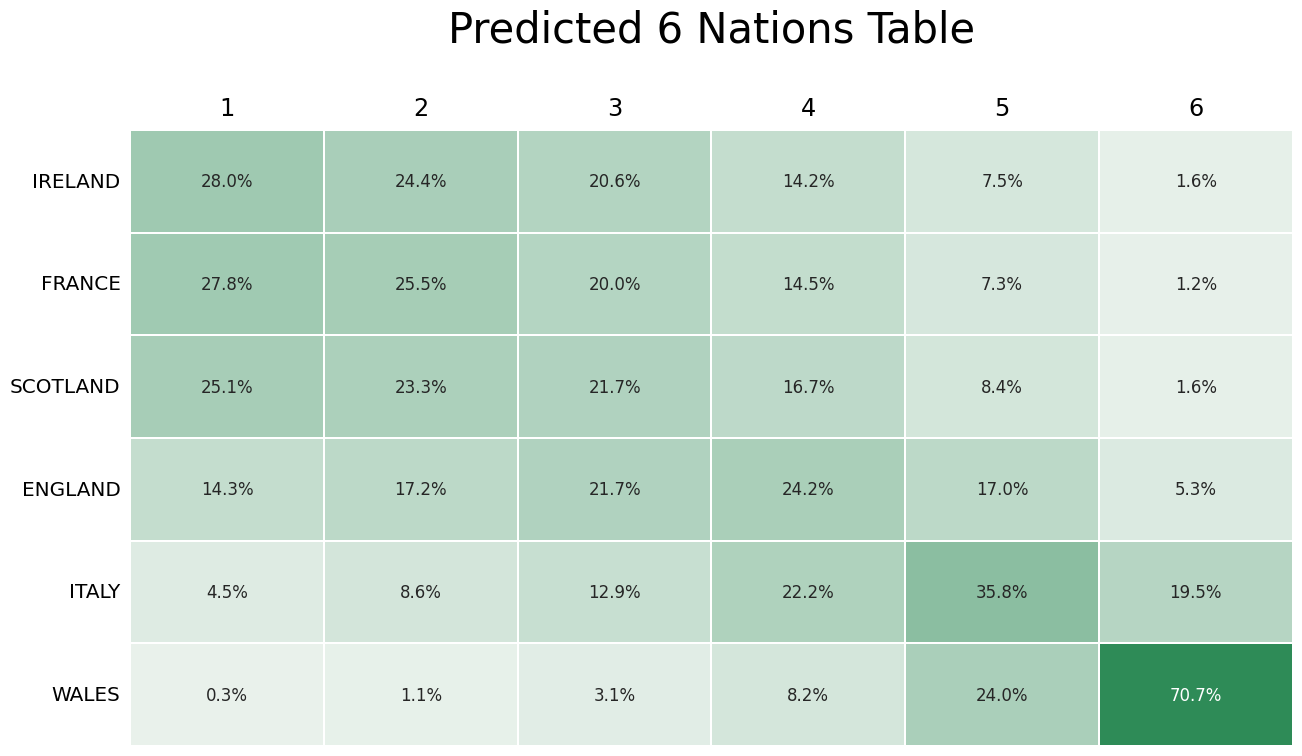

In [344]:
# plot pivoted finishes 
fig, ax = plt.subplots(1,1, figsize=(15, 8))
sns.heatmap(finish_heatmap, 
            annot=True, 
            cbar=False,
            cmap=sns.light_palette("seagreen", as_cmap=True),
           center=.35,
           linewidths=0.07,
           square=False,
           annot_kws={"size": 12},
           fmt=".1%") 


ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

ax.tick_params(left=False, top=False)

plt.yticks(fontsize='x-large', rotation=0)
plt.xticks(fontsize='xx-large')

ax.set_ylabel("",fontsize=15)
ax.set_xlabel(f"Predicted 6 Nations Table\n",fontsize=30)

plt.show()

In [29]:
# finish_heatmap.to_csv("urc_predicted_finish.csv")

NameError: name 'finish_heatmap' is not defined

pos,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
team,,,,,,,,,,,,,,,,
LEINSTER,0.927,0.065,0.007,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GLASGOW,0.057,0.674,0.199,0.048,0.016,0.004,0.001,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BULLS,0.015,0.203,0.437,0.172,0.091,0.044,0.019,0.011,0.005,0.001,0.002,NaN,NaN,NaN,NaN,NaN
MUNSTER,0.001,0.018,0.135,0.242,0.174,0.132,0.106,0.073,0.045,0.038,0.010,0.013,0.006,0.006,0.001,NaN
LIONS,NaN,0.025,0.112,0.195,0.214,0.167,0.081,0.080,0.043,0.028,0.023,0.019,0.010,0.002,0.001,NaN
EDINBURGH,NaN,0.007,0.043,0.128,0.155,0.137,0.136,0.099,0.082,0.074,0.054,0.043,0.028,0.013,NaN,0.001
SHARKS,NaN,0.005,0.018,0.060,0.090,0.098,0.138,0.138,0.099,0.104,0.096,0.070,0.046,0.033,0.005,NaN
CONNACHT,NaN,0.002,0.011,0.044,0.066,0.104,0.107,0.088,0.106,0.102,0.096,0.109,0.092,0.057,0.014,0.002
ULSTER,NaN,0.001,0.004,0.030,0.053,0.089,0.087,0.105,0.126,0.097,0.122,0.106,0.098,0.071,0.011,NaN


In [107]:
avg_points = finish_probs.groupby('team')['points'].mean().reset_index()
avg_points.index = avg_points['team']
avg_points.drop(columns=['team'], inplace=True)

avg_points

,points
team,
BENETTON,32.124
BULLS,51.124
CARDIFF,35.578
CONNACHT,35.822
DRAGONS,16.930
EDINBURGH,40.326
GLASGOW,57.122
LEINSTER,67.872
LIONS,43.460


In [122]:
avg_points = finish_probs.groupby('team')['points'].mean().reset_index()
team_order = avg_points.sort_values(by='points', ascending=False).team.values.tolist()

array(['LEINSTER', 'GLASGOW', 'BULLS', 'MUNSTER', 'LIONS', 'EDINBURGH',
       'SHARKS', 'CONNACHT', 'ULSTER', 'CARDIFF', 'STORMERS', 'BENETTON',
       'SCARLETS', 'OSPREYS', 'ZEBRE', 'DRAGONS'], dtype=object)

In [112]:
pd.concat([avg_points, finish_heatmap], axis=1)

,points,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
team,,,,,,,,,,,,,,,,,
BENETTON,32.124,NaN,NaN,0.002,0.009,0.016,0.030,0.054,0.082,0.091,0.103,0.144,0.139,0.172,0.137,0.018,0.003
BULLS,51.124,0.015,0.203,0.437,0.172,0.091,0.044,0.019,0.011,0.005,0.001,0.002,NaN,NaN,NaN,NaN,NaN
CARDIFF,35.578,NaN,NaN,0.016,0.047,0.066,0.064,0.105,0.112,0.108,0.113,0.106,0.101,0.083,0.064,0.015,NaN
CONNACHT,35.822,NaN,0.002,0.011,0.044,0.066,0.104,0.107,0.088,0.106,0.102,0.096,0.109,0.092,0.057,0.014,0.002
DRAGONS,16.930,NaN,NaN,NaN,NaN,NaN,0.001,NaN,NaN,0.001,0.002,0.003,0.012,0.027,0.097,0.381,0.476
EDINBURGH,40.326,NaN,0.007,0.043,0.128,0.155,0.137,0.136,0.099,0.082,0.074,0.054,0.043,0.028,0.013,NaN,0.001
GLASGOW,57.122,0.057,0.674,0.199,0.048,0.016,0.004,0.001,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LEINSTER,67.872,0.927,0.065,0.007,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIONS,43.460,NaN,0.025,0.112,0.195,0.214,0.167,0.081,0.080,0.043,0.028,0.023,0.019,0.010,0.002,0.001,NaN


In [1]:
raw_df

NameError: name 'rsaw_df' is not defined

In [26]:
raw_df[['match_date_dt', 'home_team', 'away_team', 'home_score', 'away_score']]#.to_csv('raw_scores.csv', index=False)

,match_date_dt,home_team,away_team,home_score,away_score
0,2021-09-04,BIARRITZ,BORDEAUX,27,15
1,2021-09-04,BRIVE,PERPIGNAN,36,15
2,2021-09-04,CASTRES,PAU,16,12
3,2021-09-04,PARIS,RACING 92,21,36
4,2021-09-04,TOULON,MONTPELLIER,24,24
...,...,...,...,...,...
2024,2025-06-07,PAU,LA ROCHELLE,0,0
2025,2025-06-07,MONTPELLIER,CLERMONT,0,0
2026,2025-06-07,LYON,RACING 92,0,0
2027,2025-06-07,BAYONNE,TOULON,0,0


In [4]:
import psycopg2

ModuleNotFoundError: No module named 'psycopg2'

In [ ]:


conn = psycopg2.connect(database="db_name",
                        host="db_host",
                        user="db_user",
                        password="db_pass",
                        port="db_port")